**Problem Statement**

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

**Problem**

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

# **Data Preprocessing**


In [1]:
# Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/loan.csv")

# Display dimensions of dataframe
print(df.shape)
print(df.info())

print("-----------------------------------------------------------------------")
# Display first 10 records
print(df.head(10))

print("-----------------------------------------------------------------------")
# List the column names
print(df.columns)


(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
-----------------------------------------------------------------------
    Loan_ID Gender Marrie

In [2]:
# Remove the first column : 'Loan_ID'
df.drop(df.columns[[0]], axis=1, inplace=True)
df.info()

print("-----------------------------------------------------------------------")
# Display statistics for numeric columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
-----------------------------------------------------------------------
       ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
count  

In [3]:
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

# df.drop_duplicates(inplace=True)


number of duplicate rows :  (0, 12)


SUM : 
 Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


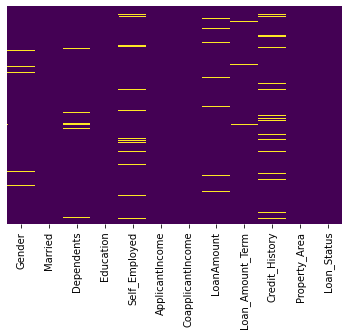

In [4]:
# To check missing values
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")


In [5]:
# non-numeric columns
df["Gender"]        = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]       = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]    = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

# numeric columns
df["LoanAmount"]       = df["LoanAmount"].fillna(df["LoanAmount"].mean())

df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].interpolate())
df["Credit_History"]   = df["Credit_History"].fillna(df["Credit_History"].interpolate())

print("SUM : \n",df.isnull().sum())


SUM : 
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<function matplotlib.pyplot.show>

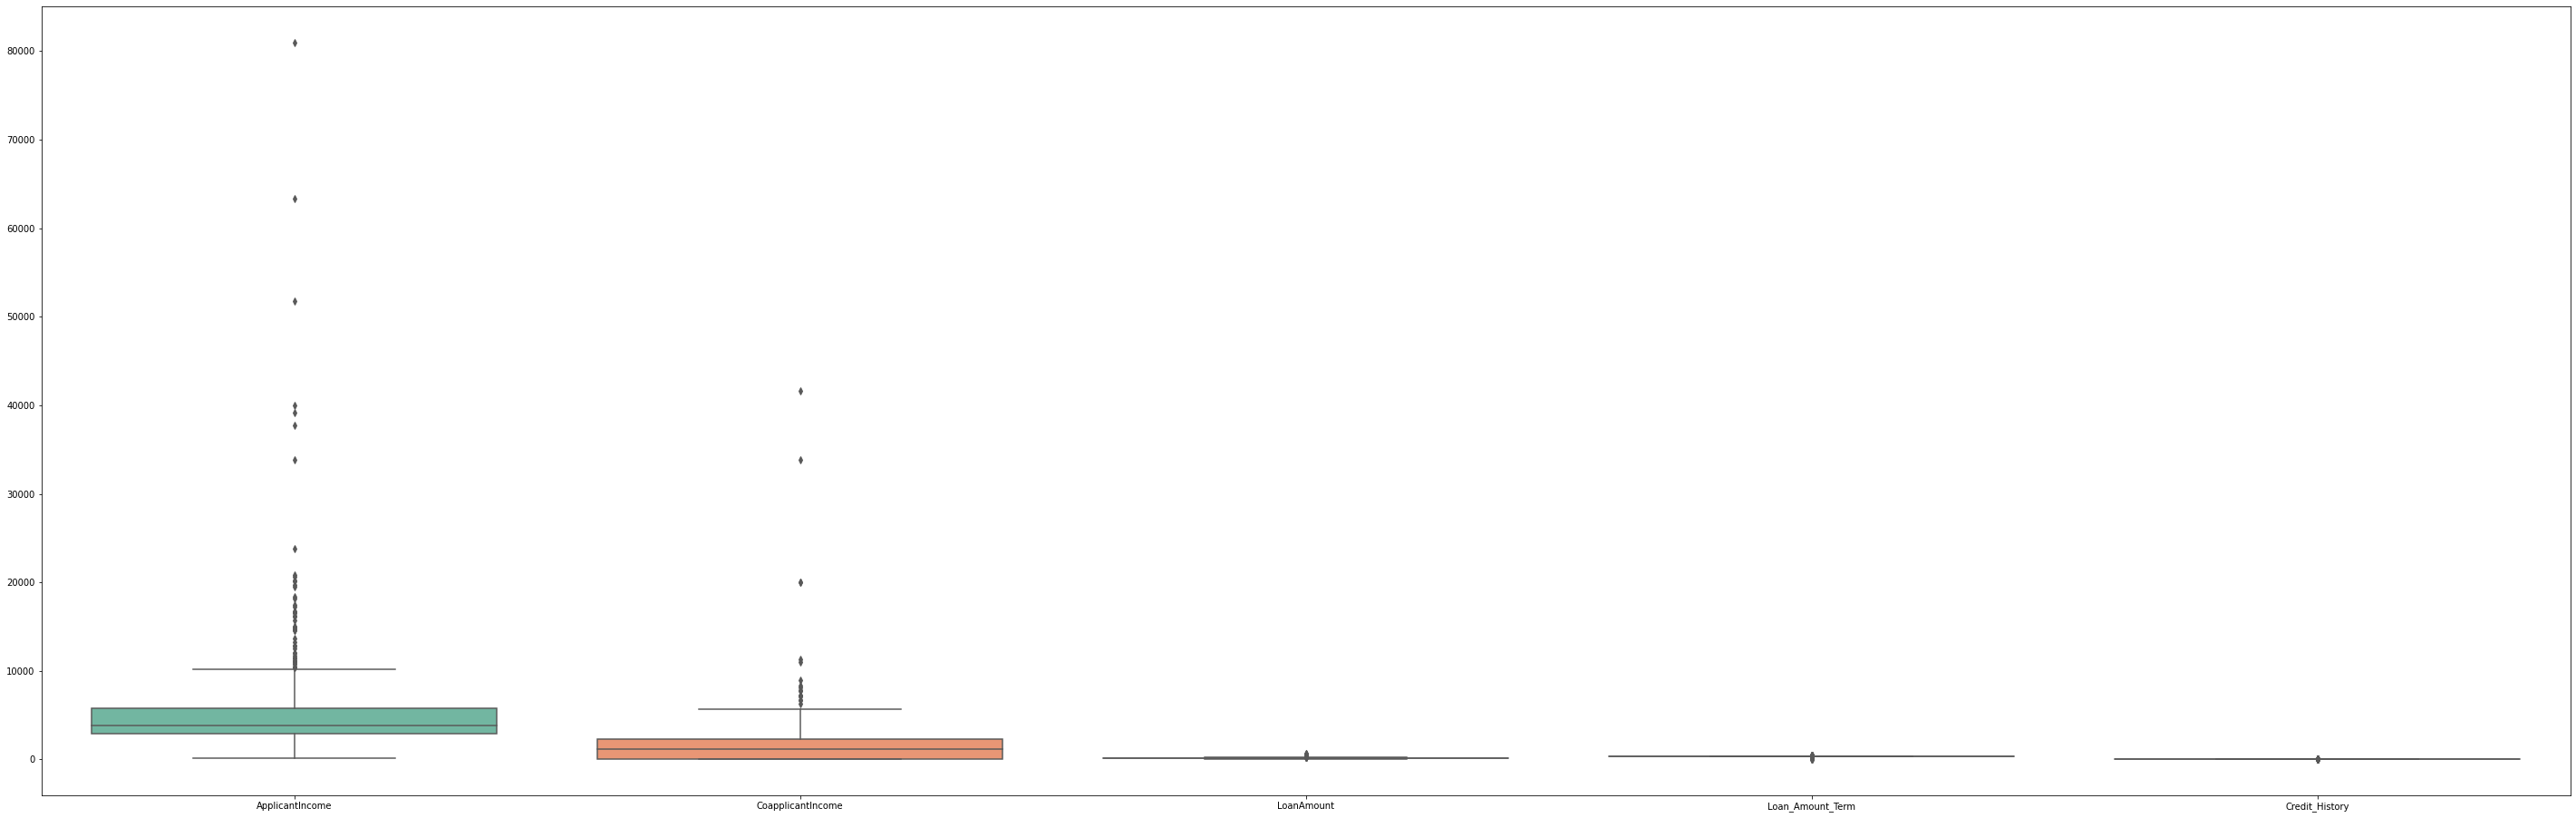

In [6]:
# Handling Outlier
fig, ax = plt.subplots(figsize=(50,16)) 
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show


In [7]:
# Remove Outlier

def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Extract all column names as list in Pandas Dataframe
lst_all_cols = df.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)

print("\n")
# Numerical data distribution
print(list(set(df.dtypes.tolist())))
df_num = df.select_dtypes(include = ["float64", "int64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")

"""
indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(df_copy[col])
    df[col] = np.where(df[col] < lower_range, lower_range, df[col]) 
    df[col] = np.where(df[col] > upper_range, upper_range, df[col])
    indx = indx +1
    print("-----------------------------")
"""

lst_all_cols : 
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


[dtype('int64'), dtype('O'), dtype('float64')]
Numerical Data : 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




'\nindx = 0\nfor col in lst_num_cols:\n    print(indx)\n    lower_range, upper_range =  remove_outlier(df_copy[col])\n    df[col] = np.where(df[col] < lower_range, lower_range, df[col]) \n    df[col] = np.where(df[col] > upper_range, upper_range, df[col])\n    indx = indx +1\n    print("-----------------------------")\n'

In [8]:
# value_counts() function : Return a Series containing counts of unique values.
print(df["Gender"].value_counts()) 
print("-----------------------------------------------------------------------")
print(df["Married"].value_counts())
print("-----------------------------------------------------------------------") 
print(df["Dependents"].value_counts()) 
print("-----------------------------------------------------------------------")
print(df["Education"].value_counts()) 
print("-----------------------------------------------------------------------")
print(df["Self_Employed"].value_counts()) 
print("-----------------------------------------------------------------------")
print(df["Property_Area"].value_counts()) 
print("-----------------------------------------------------------------------")
print(df["Loan_Status"].value_counts()) 
print("-----------------------------------------------------------------------")


Male      502
Female    112
Name: Gender, dtype: int64
-----------------------------------------------------------------------
Yes    401
No     213
Name: Married, dtype: int64
-----------------------------------------------------------------------
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
-----------------------------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
-----------------------------------------------------------------------
No     532
Yes     82
Name: Self_Employed, dtype: int64
-----------------------------------------------------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
-----------------------------------------------------------------------
Y    422
N    192
Name: Loan_Status, dtype: int64
-----------------------------------------------------------------------


In [9]:
# Mapping of data feature values
df["Gender"]        = df["Gender"].map({"Male":0,"Female":1})
df["Married"]       = df["Married"].map({"No":0,"Yes":1})
df["Dependents"]    = df["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})
df["Education"]     = df["Education"].map({"Not Graduate":0,"Graduate":1})
df["Self_Employed"] = df["Self_Employed"].map({"No":0,"Yes":1})
df["Property_Area"] = df["Property_Area"].map({"Semiurban":0,"Urban":1,"Rural":2})
df["Loan_Status"]   = df["Loan_Status"].map({"N":0,"Y":1})

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
None


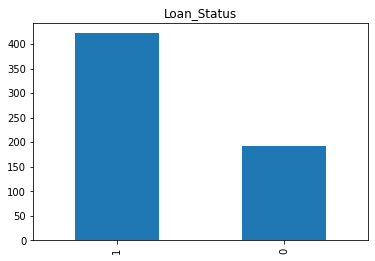

In [10]:
# Visualize the total number of labels of each type in data
df["Loan_Status"].value_counts().plot.bar(title="Loan_Status")


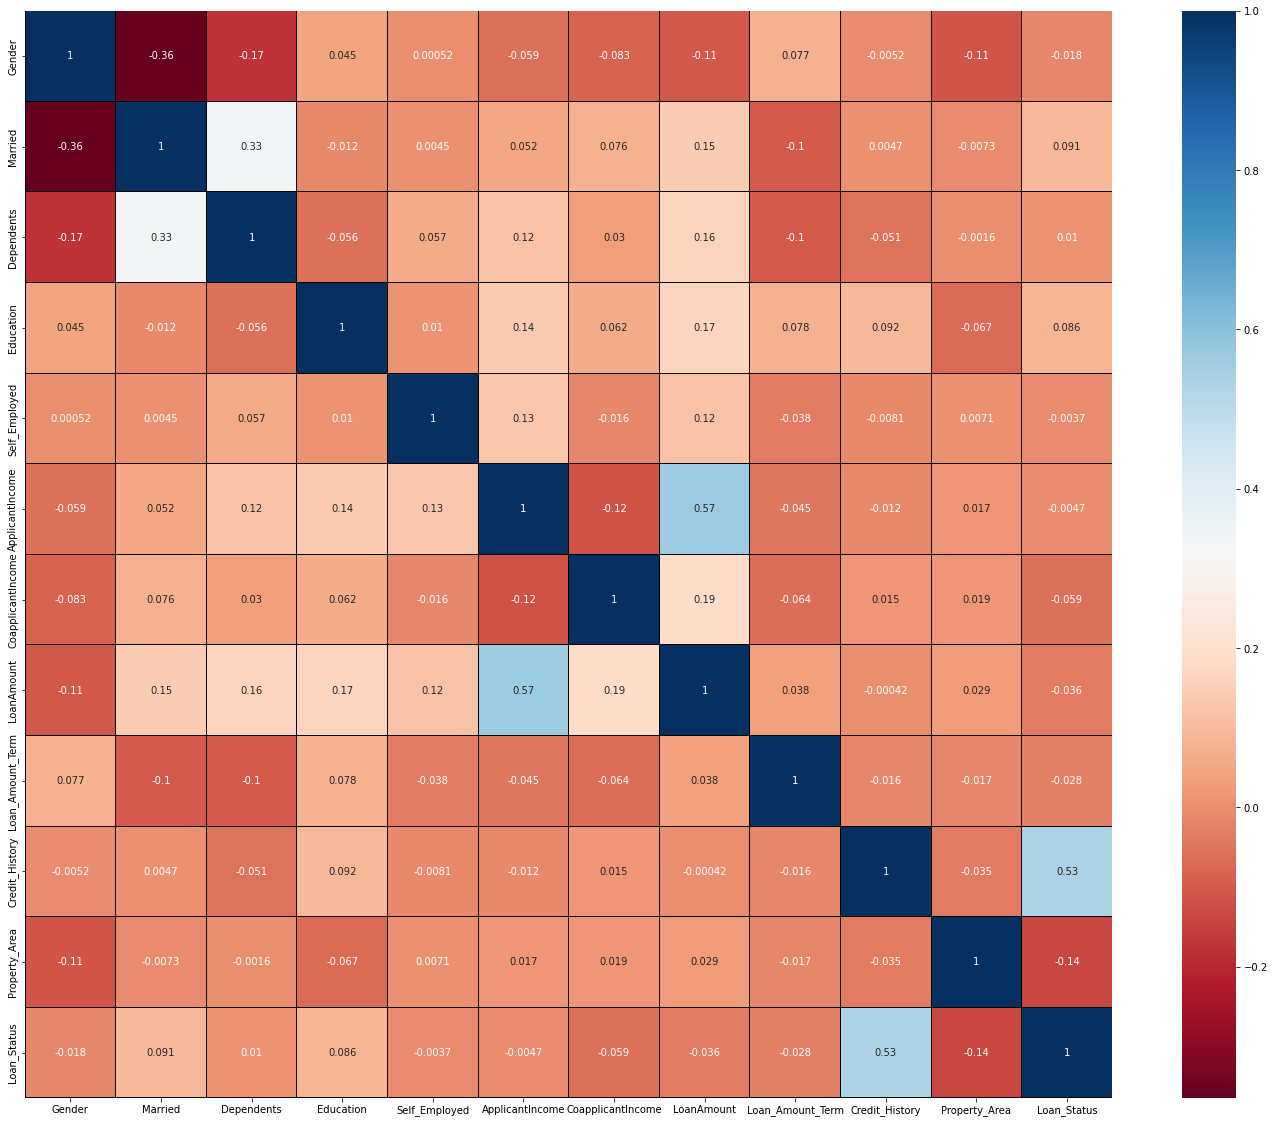

In [11]:
# Selecting Relevant Features
corrMatrix_1 = df.corr()

fig, ax = plt.subplots(figsize=(25,20)) 
#sns.heatmap(corrMatrix_1, annot=True)
sns.heatmap(corrMatrix_1, annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")


In [12]:
# Correlation with output variable
cor_target = abs(corrMatrix_1["Loan_Status"])

# Selecting highly correlated features : 0.01
relevant_features = cor_target[cor_target>0.01]
print("relevant_features : ",relevant_features.shape,"\n",relevant_features)

print("-----------------------------------------------------------------------")
lst_columns = relevant_features.index.to_list()

my_data = pd.DataFrame(df, columns= lst_columns)
print (my_data.head(10))

print("-----------------------------------------------------------------------")
my_cols = my_data.columns.to_list()
print("List the column names : ",len(my_cols),"\n",my_cols)


relevant_features :  (10,) 
 Gender               0.017987
Married              0.091478
Dependents           0.010118
Education            0.085884
CoapplicantIncome    0.059187
LoanAmount           0.036416
Loan_Amount_Term     0.028170
Credit_History       0.533825
Property_Area        0.137545
Loan_Status          1.000000
Name: Loan_Status, dtype: float64
-----------------------------------------------------------------------
   Gender  Married  Dependents  ...  Credit_History  Property_Area  Loan_Status
0       0        0           0  ...             1.0              1            1
1       0        1           1  ...             1.0              2            0
2       0        1           0  ...             1.0              1            1
3       0        1           0  ...             1.0              1            1
4       0        0           0  ...             1.0              1            1
5       0        1           2  ...             1.0              1            1
6    

In [13]:
# Define X variables and our target(y)
X = my_data.drop(["Loan_Status"],axis=1).values
y = my_data["Loan_Status"].values
print("X : ",X.shape," y : ",y.shape)

# Standardization
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()
st_scaler.fit(X)
X_st_scaler = st_scaler.transform(X)


# Split into Input and Output Elements
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_st_scaler, 
              y, test_size= 0.20, random_state=100, stratify=y)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)


X :  (614, 9)  y :  (614,)
X_train =  (491, 9)  y_train =  (491,)
X_test  =  (123, 9)  y_test =  (123,)


# **Classification Algorithm**

-----------------------------------------------------------------------
cls : LogisticRegression  Accuracy:  0.821
-----------------------------------------------------------------------
-----------------------------------------------------------------------
cls : RandomForestClassifier  Accuracy:  0.7963333333333333
-----------------------------------------------------------------------
-----------------------------------------------------------------------
cls : SVC  Accuracy:  0.8126666666666666
-----------------------------------------------------------------------
-----------------------------------------------------------------------
cls : MLPClassifier  Accuracy:  0.732
-----------------------------------------------------------------------
[1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix: 
 [[18 20]
 [ 1 84]]


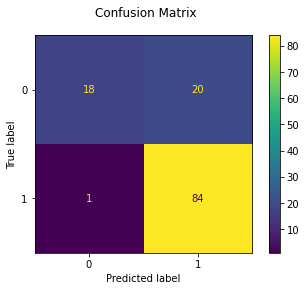

In [14]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

# Classifiers
log_clf1 = LogisticRegression()
rnd_clf2 = RandomForestClassifier(n_estimators=600)
svm_clf3 = SVC(kernel="rbf", C=100, gamma=0.0001)
mlp_clf4 = MLPClassifier(hidden_layer_sizes=(256, 128, 128, 32, ), batch_size=64,
                    solver="adam", alpha=0.0001, activation="logistic", 
                    max_iter=50000, random_state=42)

# Voting Classifier : hard
voting_clf = VotingClassifier(
             estimators=[("lr", log_clf1), ("rf", rnd_clf2), 
            ("svc", svm_clf3), ("mlp", mlp_clf4)],
            voting="hard",
            weights=[1,1,1,1]
            )

# Train the classifier
voting_clf.fit(X_train, y_train)

# Classification report 
for clf in (log_clf1, rnd_clf2, svm_clf3, mlp_clf4):
    scores = cross_val_score(clf, X_test, y_test, scoring="accuracy")
    print("-----------------------------------------------------------------------")
    print("cls :",clf.__class__.__name__," Accuracy: ", scores.mean())
    print("-----------------------------------------------------------------------")

predicted = voting_clf.predict(X_test)
print(predicted)
print("Classification report : \n", voting_clf,"\n", metrics.classification_report(y_test, predicted))
disp = metrics.plot_confusion_matrix(voting_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


# **Inference**

In [15]:
!pip install gradio

     |████████████████████████████████| 979 kB 5.5 MB/s 
     |████████████████████████████████| 206 kB 45.7 MB/s 
     |████████████████████████████████| 1.9 MB 23.7 MB/s 
     |████████████████████████████████| 3.6 MB 32.2 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 961 kB 31.6 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=d8335c9dcf6400641fae1a91aa5287a264d699b8c196650628f7ecb11a69668b
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=cc447959d74da7936a0f4c8d1fb50eea0c5de0f3ef1ab0f36d266d2c5cdc6e50
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [20]:
# https://www.gradio.app/ml_examples

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests

def inference(Gender, Married, Education, Dependents, Property_Area, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History ):
    g = str(Gender) 
    if g == "Male": g=0
    else: g=1

    m = Married 
    if m == "No": m=0
    else: m=1

    d = Dependents
    if d=="0":
      d=0
    elif d=="1":
      d=1
    elif d=="2":
      d=2
    else:
      d=3

    e = Education
    if e == "Graduate": e=1
    else: e=0
       
    ci = CoapplicantIncome 
    la = LoanAmount
    lat = Loan_Amount_Term 
    ch = Credit_History

    pa = Property_Area
    if pa=="Semiurban":
      pa=0
    elif pa=="Urban":
      pa=1
    else:
      pa=2
    
    features = []
    lst =[float(g), float(m), float(d), float(e), float(ci), float(la), float(lat), float(ch), float(pa)]
    features.append(lst)
    features = np.array(features)
    features = st_scaler.transform(features)
    
    predicted = voting_clf.predict(features)
    
    if predicted[0] == 1 : return "The customer loan is valid"
    else : return "The customer loan is not valid"


gr.Interface(inference,  
            [
             gr.inputs.Radio(["Male", "Female"], label="Gender : "),
             gr.inputs.Radio(["Yes", "No"], label="Married : "),
             gr.inputs.Radio(["Graduate", "Not Graduate"], label="Education : "),
             gr.inputs.Dropdown(["0", "1", "2","3+"], label="Dependents : "),
             gr.inputs.Dropdown(["Semiurban", "Urban", "Rural"], label="Property_Area : "),

             gr.inputs.Number(label="CoapplicantIncome : "),
             gr.inputs.Number(label="LoanAmount : "),
             gr.inputs.Number(label="Loan_Amount_Term : "),
             gr.inputs.Slider(minimum=0, maximum=1, step=1, label="Credit_History : "),
             # gr.inputs.Number(label="Credit_History : "),
            ],
            [
            gr.outputs.Label(), 
            ],
             theme="darkgrass"
            ).launch(share=True) #, debug=True Use in Colab


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://54683.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7862/',
 'https://54683.gradio.app')